In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_theme(style="whitegrid")
df = pd.read_csv("titanic.csv")

# Getting numerical data.
print(df.describe())
print(df.median(numeric_only=True))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age      

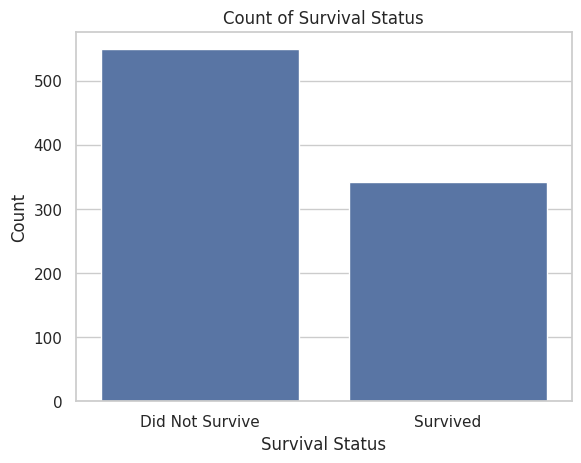

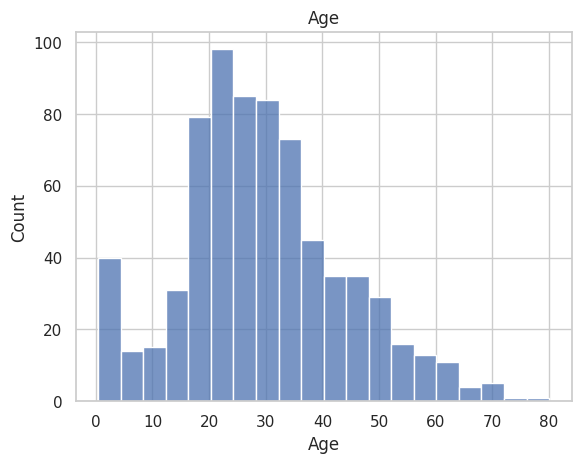

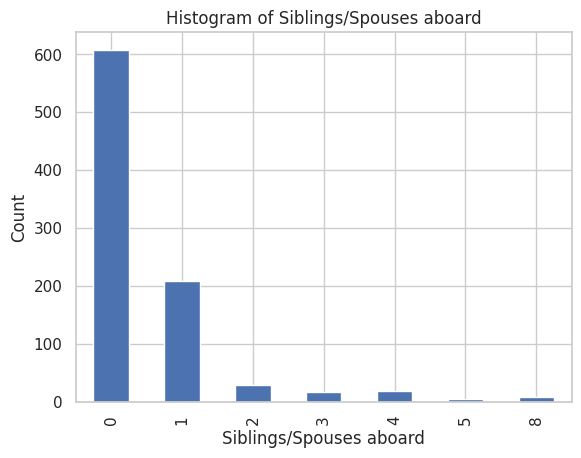

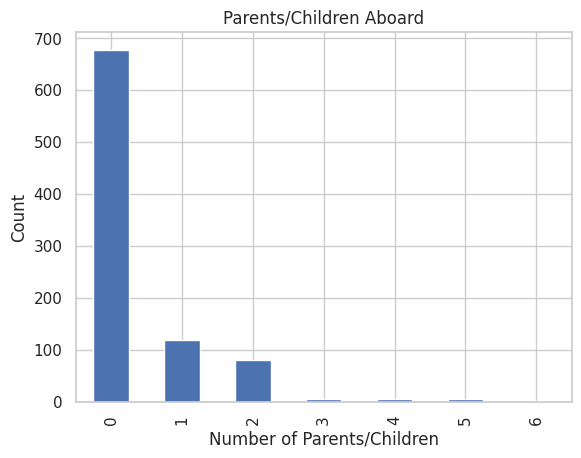

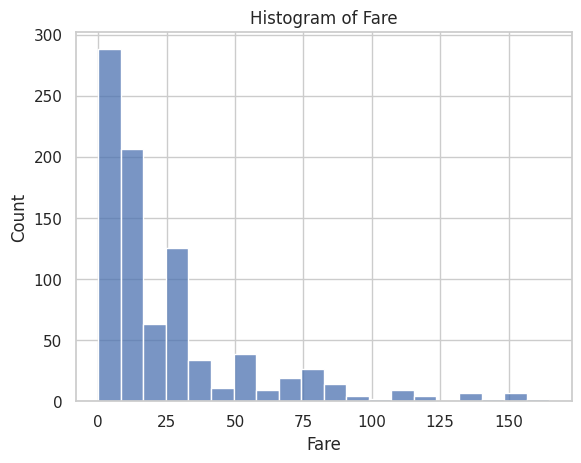

In [51]:
# Creating histograms of each variable in data.
df['Pclass'] = df['Pclass'].astype('object')
for column in df.select_dtypes(include=[float, int]):
  if column == 'PassengerId':
    continue
  elif column == 'SibSp':
        fig, ax = plt.subplots()
        df['SibSp'].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_title('Histogram of Siblings/Spouses aboard')
        ax.set_xlabel('Siblings/Spouses aboard')
        ax.set_ylabel('Count')
        plt.show()
  elif column == 'Survived':
        fig, ax = plt.subplots()
        sns.countplot(x=column, data=df, ax=ax)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Did Not Survive', 'Survived'])
        ax.set_title('Count of Survival Status')
        ax.set_xlabel('Survival Status')
        ax.set_ylabel('Count')
        plt.show()
  elif column == 'Parch':
        fig, ax = plt.subplots()
        df['Parch'].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_title('Parents/Children Aboard')
        ax.set_xlabel('Number of Parents/Children')
        ax.set_ylabel('Count')
  else:
      if column == 'Fare':
          fig, ax = plt.subplots()
          sns.histplot(df[df['Fare'] <= 200]['Fare'], bins=20, ax=ax)
      else:
          fig, ax = plt.subplots()
          sns.histplot(df[column].dropna(), bins=20, ax=ax)
          ax.set_title(column)

ax.set_title(f'Histogram of {column}')
ax.set_xlabel(column)
ax.set_ylabel('Count')
plt.show()

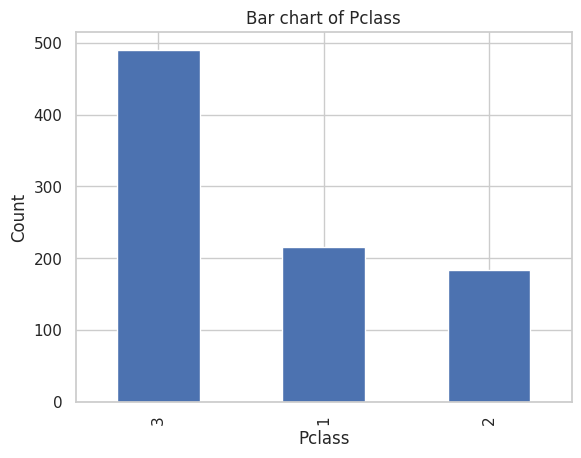

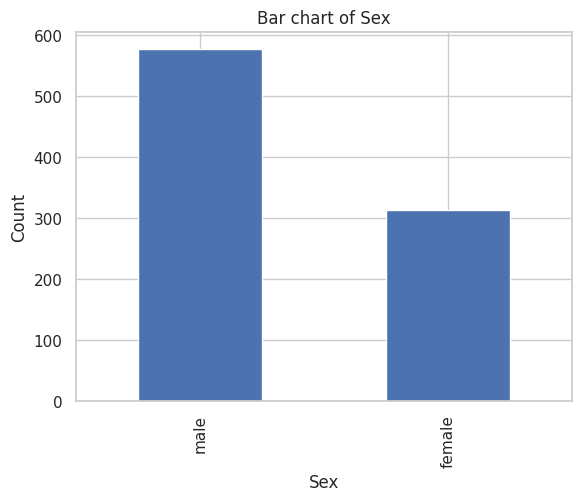

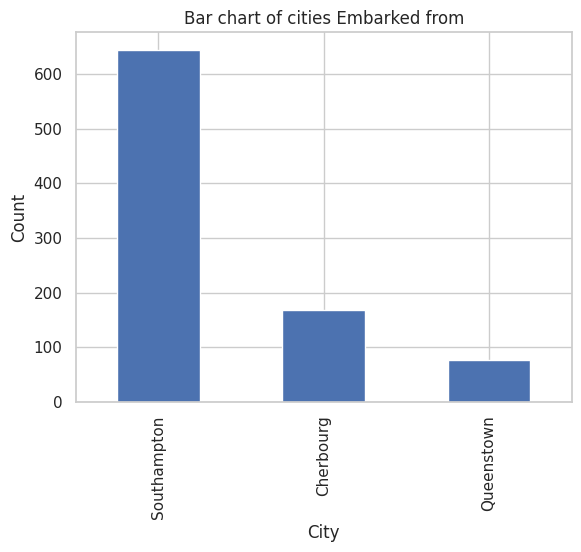

In [52]:
for column in df.select_dtypes(exclude=[float, int]):
  if column == "Name" or column == "Cabin" or column == "Ticket":
    continue
  elif column == "Embarked":
    # Replace "S, C, and Q" from table with the names of the cities for improved readability and understanding
    df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
    fig, ax = plt.subplots()
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title('Bar chart of cities Embarked from')
    ax.set_xlabel('City')
    ax.set_ylabel('Count')
    plt.show()
  else:
    fig, ax = plt.subplots()
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar chart of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    plt.show()

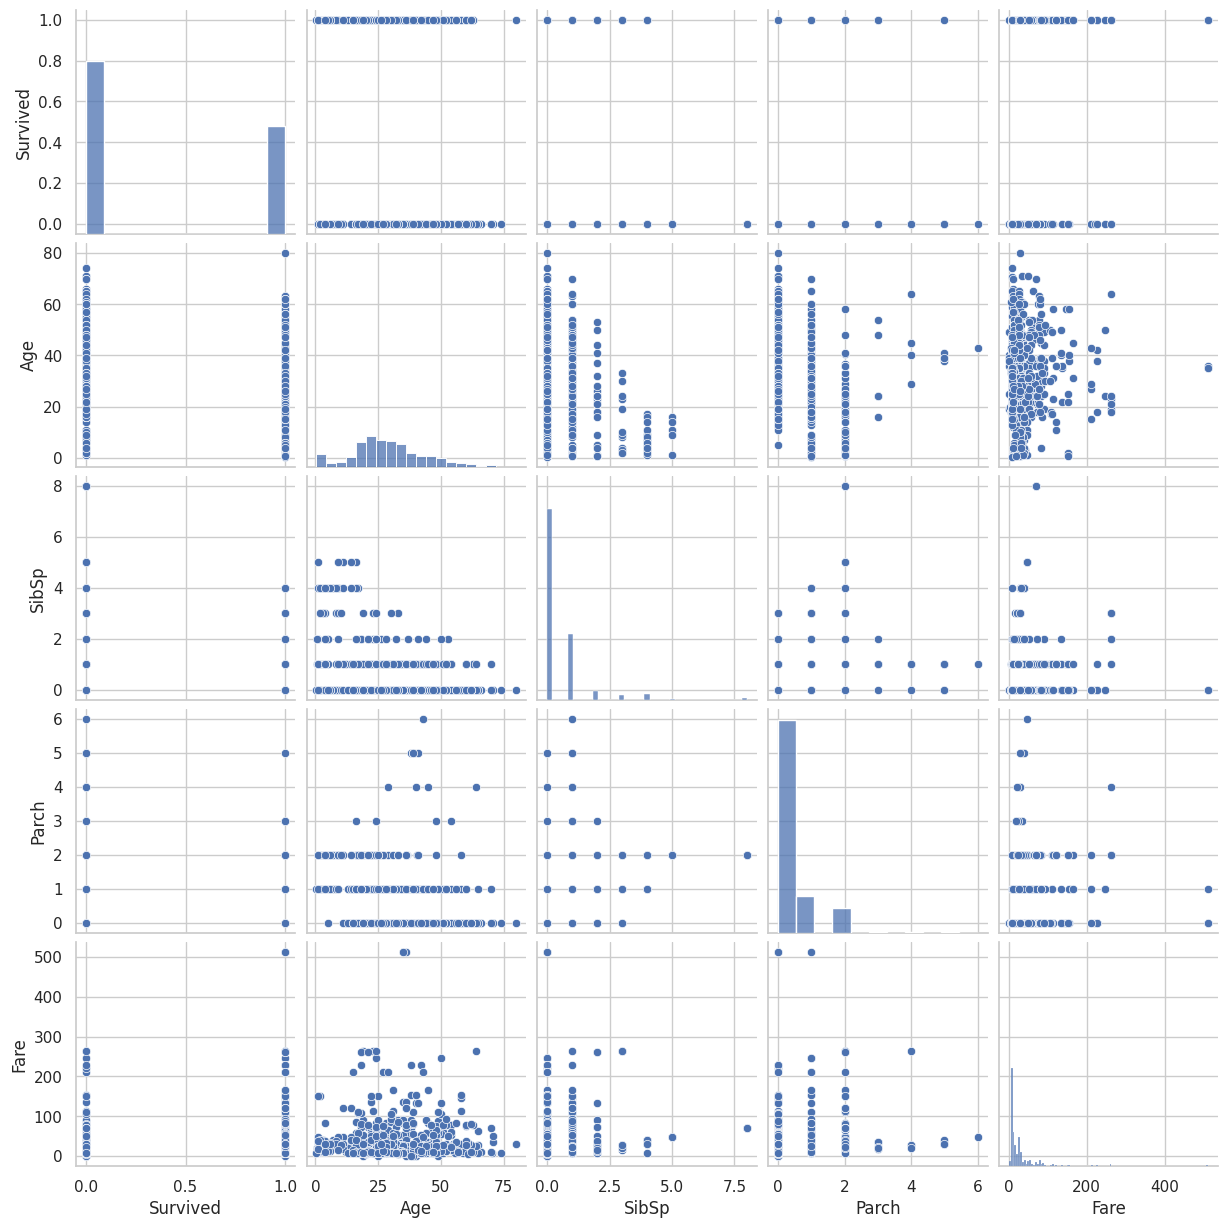

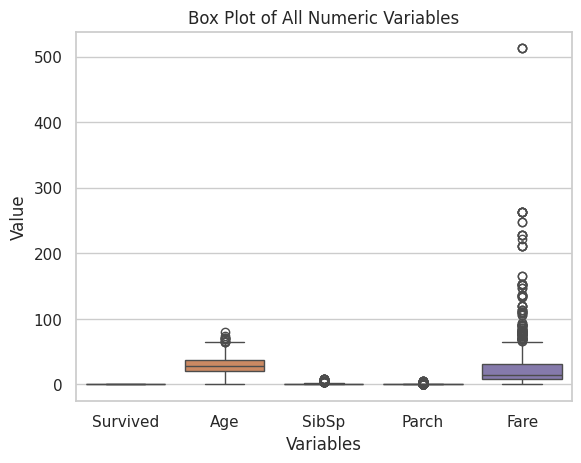

In [65]:
# Now showing pair-wise relationships with matrix of scatter plots
# only use the numerical categories

df['Survived'] = df['Survived'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)
numerical_categories = df.select_dtypes(include=[float, int, 'category'])
finaldf = numerical_categories.drop('PassengerId', axis=1)
sns.pairplot(finaldf)
plt.show()

numeric_cols = df.select_dtypes(include=[float, int]).drop(columns=['PassengerId'])
fig, ax = plt.subplots()
sns.boxplot(data=numeric_cols, ax=ax)
ax.set_title('Box Plot of All Numeric Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Value')
plt.show()

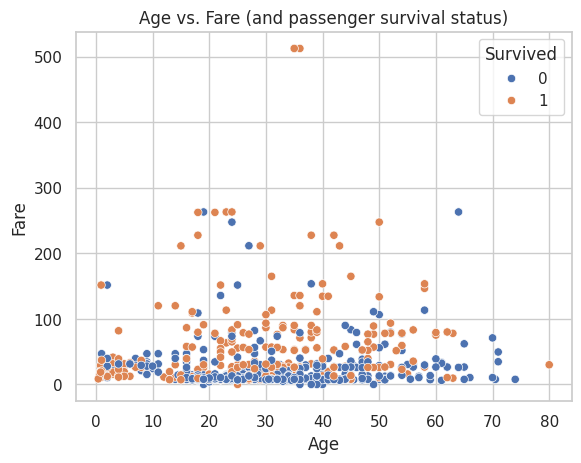

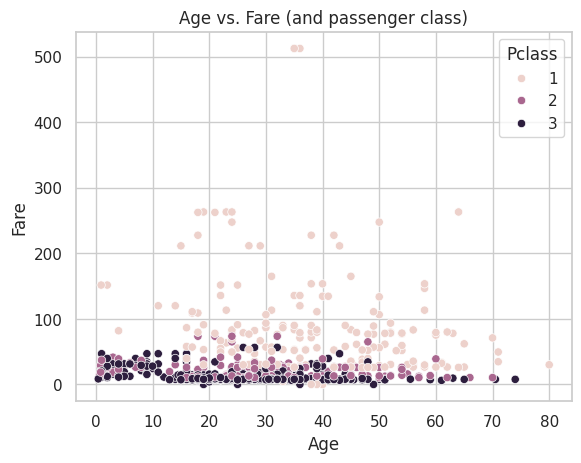

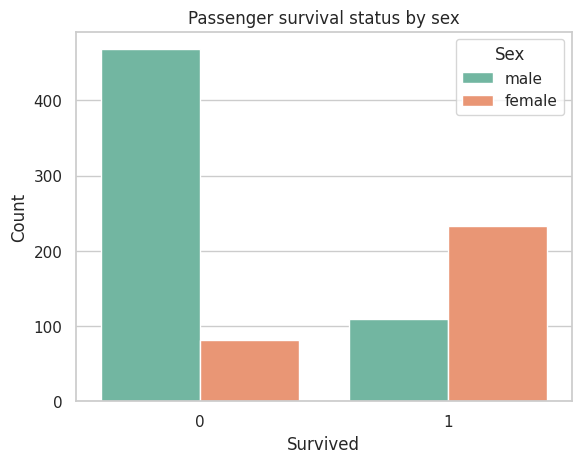

In [62]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
ax.set_title('Age vs. Fare (and passenger survival status)')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
ax.set_title('Age vs. Fare (and passenger class)')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

fig, ax = plt.subplots()
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set2', dodge=True)
ax.set_title('Passenger survival status by sex')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
plt.show()

In [70]:
#Showing outliers for Fare, Age, SibSp, and Parch
columns = ['Fare', 'Age', 'SibSp', 'Parch']
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)][column]
    print(f"Category: {column}")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Outliers in {column}:")
    print(outliers.values)
    print()

Category: Fare
Max: 512.3292
Min: 0.0
Mean: 32.204207968574636
Median: 14.4542
Outliers in Fare:
[ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55
  69.55   146.5208  69.55   113.275   76.2917  90.      83.475   90.
  79.2     86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85
  91.0792 151.55   247.5208 151.55   110.8833 108.9     83.1583 262.375
 164.8667 134.5     69.55   135.6333 153.4625 133.65    66.6    134.5
 263.      75.25    69.3    135.6333  82.1708 211.5    227.525   73.5
 120.     113.275   90.     120.     263.      81.8583  89.1042  91.0792
  90.      78.2667 151.55    86.5    108.9     93.5    221.7792 106.425
  71.     106.425  110.8833 227.525   79.65   110.8833  79.65    79.2
  78.2667 153.4625  77.9583  69.3     76.7292  73.5    113.275  133.65
  73.5    512.3292  76.7292 211.3375 110.8833 227.525  151.55   227.525
 211.3375 512.3292  78.85   262.375   71.      86.5 